### Library

In [10]:
import pandas as pd
import numpy as np
from numpy import array

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from mape import mean_absolute_percentage_error

from IPython.display import clear_output
from pandas import ExcelWriter

import keras
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.models import model_from_json
from keras.layers import Dropout

from data_reshape import univariate_reshape
from Remove_Duplicate import Remove

### Data Beban Historis

In [11]:
path = r'power_dataset.xlsx'
data = pd.read_excel (path)

### Data Parameter yang akan diuji

In [12]:
# path = r'RNN_timesteps.xlsx'
# df_par = pd.read_excel(path)

# path = r'RNN_features.xlsx'
# df_par = pd.read_excel(path)

path = r'RNN_hidden_layer.xlsx'
df_par = pd.read_excel(path)
df_par

Unnamed: 0  dataset  timesteps  feature  hidden_layer  RMSE  MAPE
0            0        1          1      504             2     0     0
1            1        2          1      504             2     0     0
2            2        3          1      504             2     0     0
3            3        4          1      504             2     0     0
4            4        5          1      504             2     0     0
5            5        6          1      504             2     0     0
6            6        7          1      504             2     0     0
7            7        8          1      504             2     0     0
8            8        9          1      504             2     0     0
9            9       10          1      504             2     0     0
10          10       11          1      504             2     0     0
11          11       12          1      504             2     0     0
12          12       13          1      504             2     0     0
13          13       14          1      504             2     0     0
14          14       15          1      504             2     0     0
15          15       16          1      504             2     0     0
16          16       17          1      504             2     0     0
17          17       18          1      504             2     0     0
18          18       19          1      504             2     0     0
19          19       20          1      504             2     0     0
20          20       21          1      504             2     0     0
21          21       22          1      504             2     0     0
22          22       23          1      504             2     0     0
23          23       24          1      504             2     0     0
24          24       25          1      504             2     0     0
25          25       26          1      504             2     0     0
26          26       27          1      504             2     0     0
27          27       28          1      504             2     0     0
28          28       29          1      504             2     0     0
29          29       30          1      504             2     0     0
30          30        1          1      504             3     0     0
31          31        2          1      504             3     0     0
32          32        3          1      504             3     0     0
33          33        4          1      504             3     0     0
34          34        5          1      504             3     0     0
35          35        6          1      504             3     0     0
36          36        7          1      504             3     0     0
37          37        8          1      504             3     0     0
38          38        9          1      504             3     0     0
39          39       10          1      504             3     0     0
40          40       11          1      504             3     0     0
41          41       12          1      504             3     0     0
42          42       13          1      504             3     0     0
43          43       14          1      504             3     0     0
44          44       15          1      504             3     0     0
45          45       16          1      504             3     0     0
46          46       17          1      504             3     0     0
47          47       18          1      504             3     0     0
48          48       19          1      504             3     0     0
49          49       20          1      504             3     0     0
50          50       21          1      504             3     0     0
51          51       22          1      504             3     0     0
52          52       23          1      504             3     0     0
53          53       24          1      504             3     0     0
54          54       25          1      504             3     0     0
55          55       26          1      504             3     0     0
56          56

Nama file saat disimpan :

In [13]:
algorithm_name = 'Revisi RNN'
# parameter_name = 'timesteps'
# parameter_name = 'features'
parameter_name = 'hidden layer'

# variabel_list = df_par.timesteps.iloc[:]
# variabel_list = df_par.feature.iloc[:]
variabel_list = df_par.hidden_layer.iloc[:]
unique_variabel = Remove(variabel_list)
variabel = pd.DataFrame(columns = ['variabel'])
variabel.variabel = unique_variabel
variabel

variabel
0         2
1         3

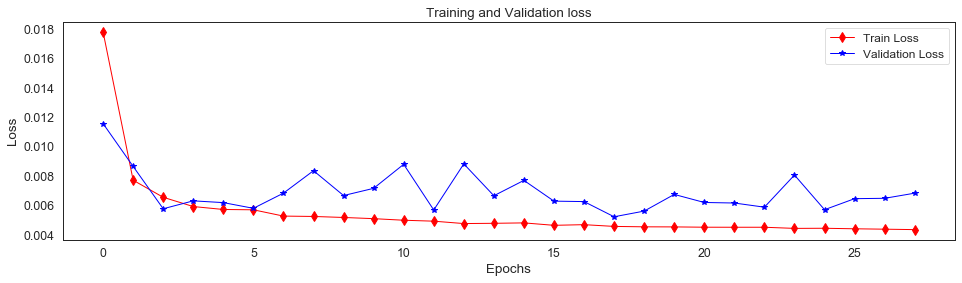

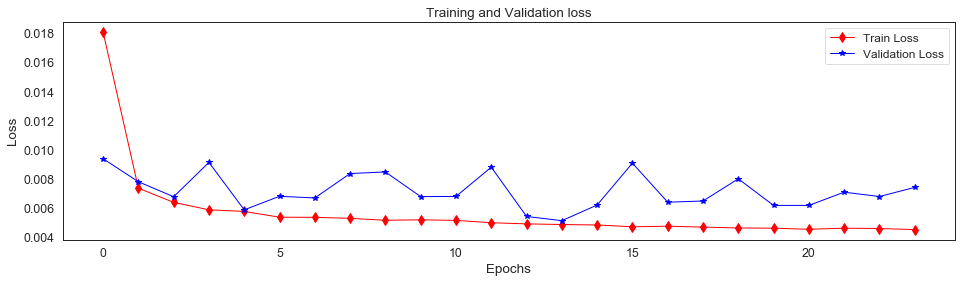

In [14]:
# Training & Save Model
r = 1
path = r'power_dataset.xlsx'
data = pd.read_excel (path)
batas_dataset = 60

dataset = data.power.iloc[:-batas_dataset*24*7]
dataset = pd.DataFrame(dataset)
target_dum = data.power.iloc[-batas_dataset*24*7:-(batas_dataset-1)*24*7]
target_dum = target_dum.reset_index(drop=True)

# Normalize Dataset 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

for d in range(len(variabel)) :
    
    print("Training Model {}/{}\n".format(r,len(variabel)))
    r = r+1

    in_steps = 1
#     in_steps = variabel.variabel.iloc[d]
    in_features = 504
#     in_features = variabel.variabel.iloc[d].tolist()
    out_steps = 168
    
    train_x,train_y, _ = univariate_reshape(dataset,in_steps,in_features,out_steps,target_dum)

    
     ##### Parameter RNN
    verbose = 1
    epochs = 500
    batch_size = 50
    neuron_layer_1 = in_features
    neuron_layer_2 = in_features
    neuron_layer_3 = in_features
    dropout_rate = 0.1

#     print("Hidden Layer : {}\n".format(variabel.variabel.iloc[d]))
    print("Hidden Layer : {}\n".format(df_par.hidden_layer.iloc[d]))

#     if df_par.hidden_layer.iloc[d] == 1:
    if variabel.variabel.iloc[d] == 1:
        # Model RNN
        model = Sequential()
        model.add(SimpleRNN(neuron_layer_1, input_shape=(in_steps, in_features), return_sequences=False))
        model.add(Dropout(dropout_rate))
        model.add(Dense(out_steps))
#     elif df_par.hidden_layer.iloc[d] == 2:
    elif variabel.variabel.iloc[d] == 2:
        # Model RNN
        model = Sequential()
        model.add(SimpleRNN(neuron_layer_1, input_shape=(in_steps, in_features), return_sequences=True))
        model.add(SimpleRNN(neuron_layer_2,input_shape=(in_steps, in_features), return_sequences=False))
        model.add(Dropout(dropout_rate))
        model.add(Dense(out_steps))
#     elif df_par.hidden_layer.iloc[d] == 3:
    elif variabel.variabel.iloc[d] == 3:
        # Model RNN
        model = Sequential()
        model.add(SimpleRNN(neuron_layer_1, input_shape=(in_steps, in_features), return_sequences=True))
        model.add(SimpleRNN(neuron_layer_2,input_shape=(in_steps, in_features), return_sequences=True))
        model.add(SimpleRNN(neuron_layer_3,input_shape=(in_steps, in_features)))
        model.add(Dropout(dropout_rate))
        model.add(Dense(out_steps))

    model.compile(loss='mse', optimizer='adam')
    es = keras.callbacks.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min',  restore_best_weights=True)
    history = model.fit(train_x, train_y, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=verbose, callbacks=[es])

    # PLOT TRAIN and Validation LOSS
    sns.set_style('white')
    sns.set_context("paper", font_scale=1.4)  
    plt.figure(figsize=(16,4))
    plt.plot(history.history['loss'], color='r', linewidth=1, marker='d', markersize=7, label='Train Loss')
    plt.plot(history.history['val_loss'], color='b',linewidth=1, marker='*',markersize=6, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation loss')
    legend = plt.legend(loc='upper right',prop={'size': 12})
    plt.savefig('{} parameter {} model number {} - loss.png'.format(parameter_name, algorithm_name,d), dpi=500)

    # serialize model to JSON
    model_json = model.to_json()
    with open("{} parameter {} model number {}.json".format(parameter_name, algorithm_name,d), "w") as json_file:
        json_file.write(model_json)

    # serialize weights to HDF5
    model.save_weights("{} parameter {} model number {}.h5".format(parameter_name, algorithm_name,d))
    
    print("")
    print("Resetting Model..")
    model.reset_states()
    
    clear_output(wait=False)

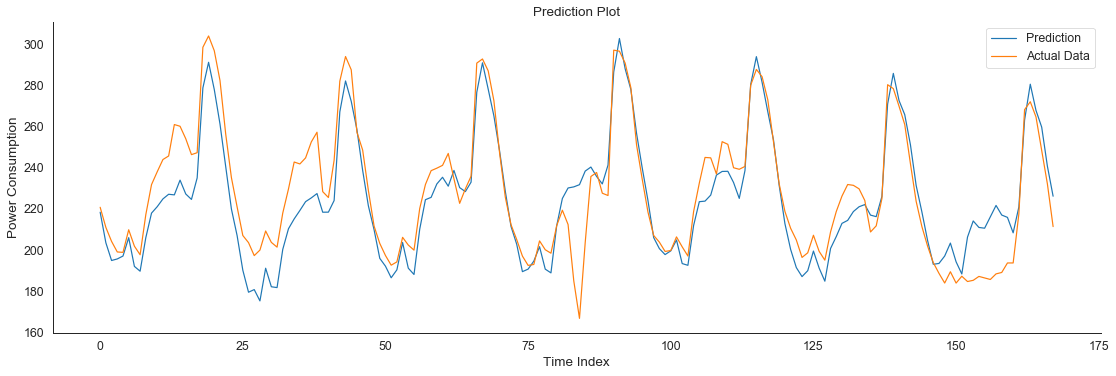

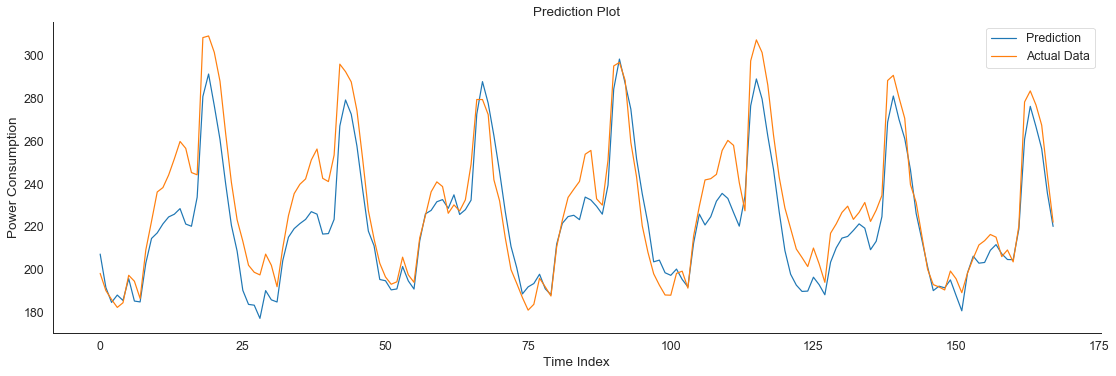

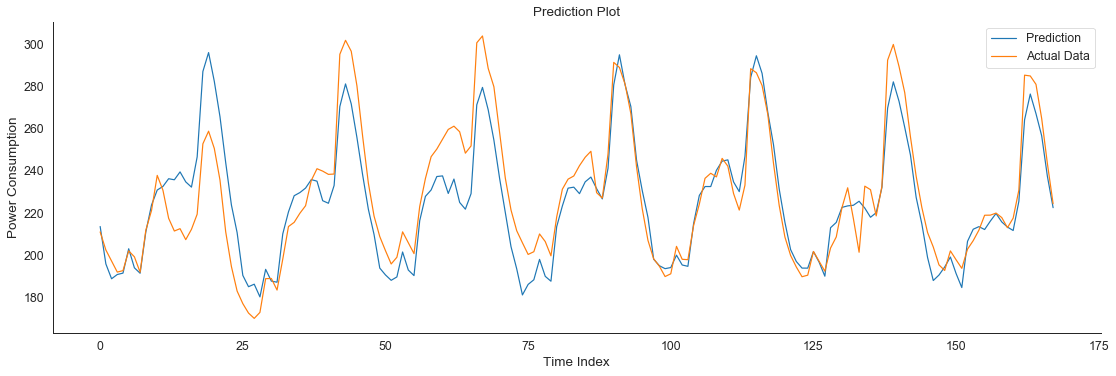

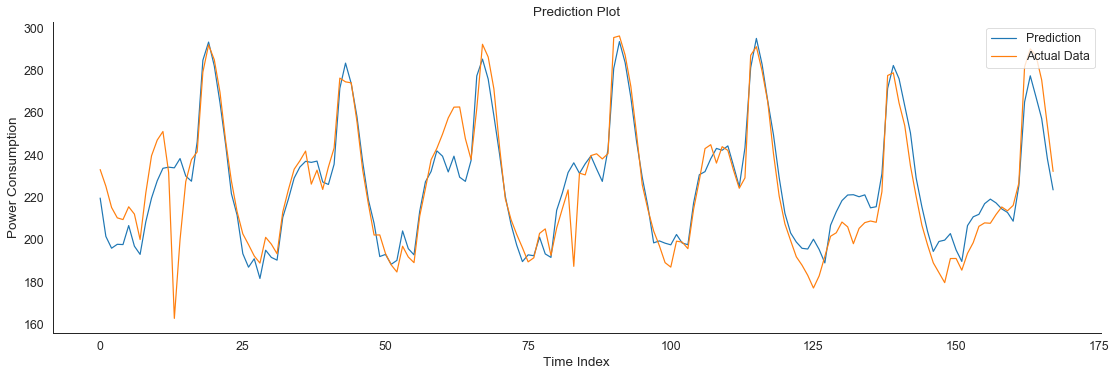

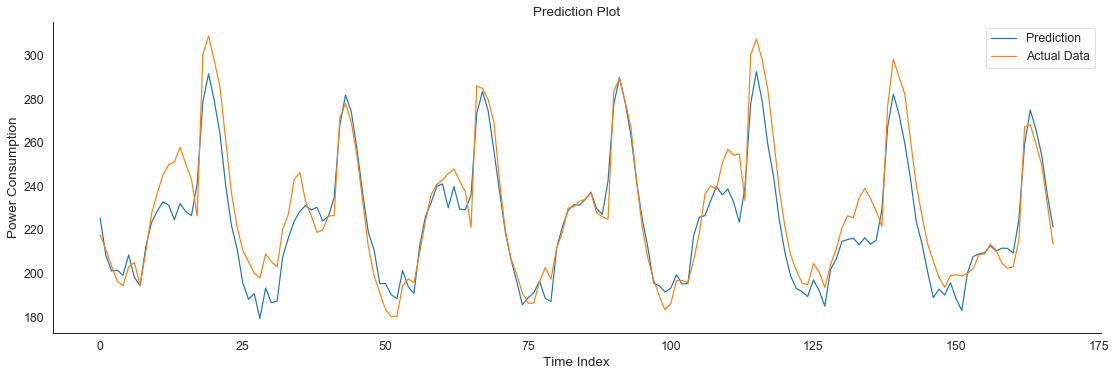

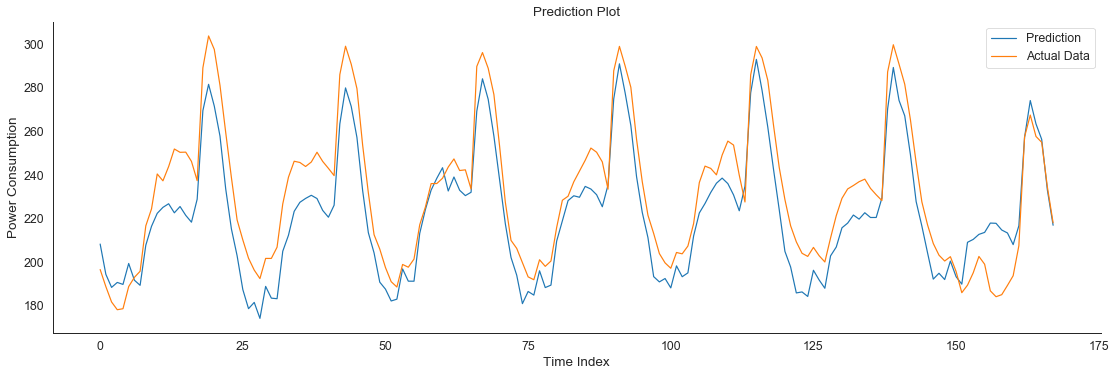

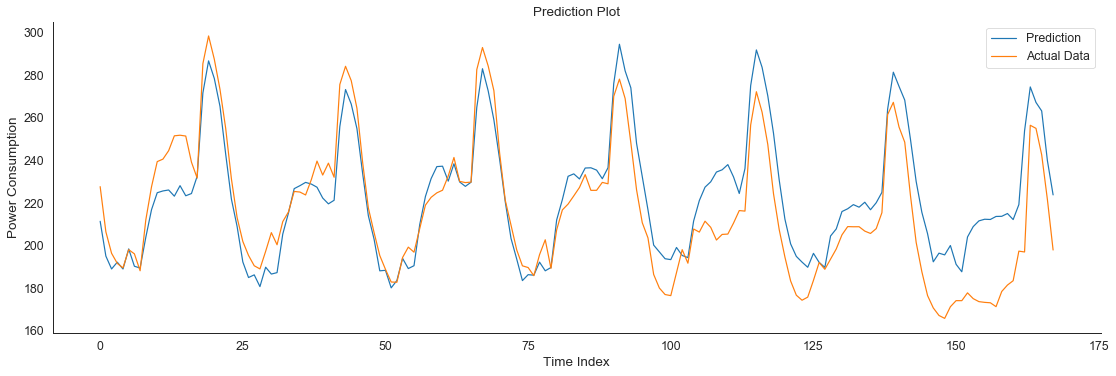

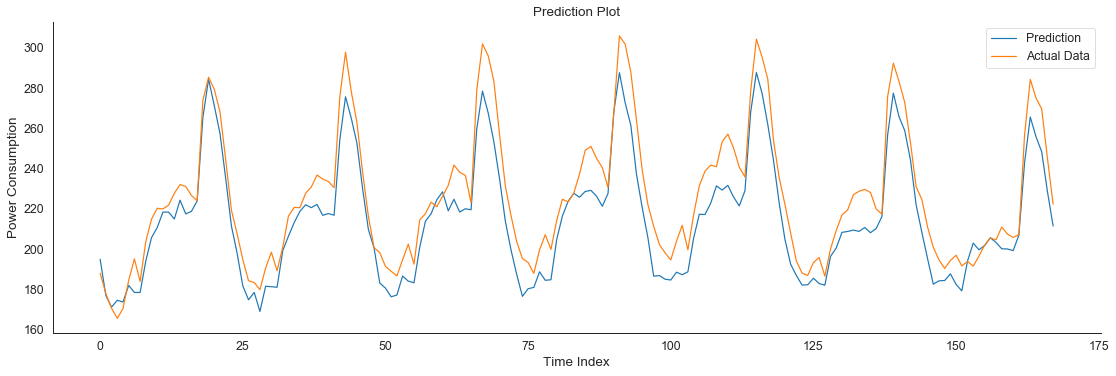

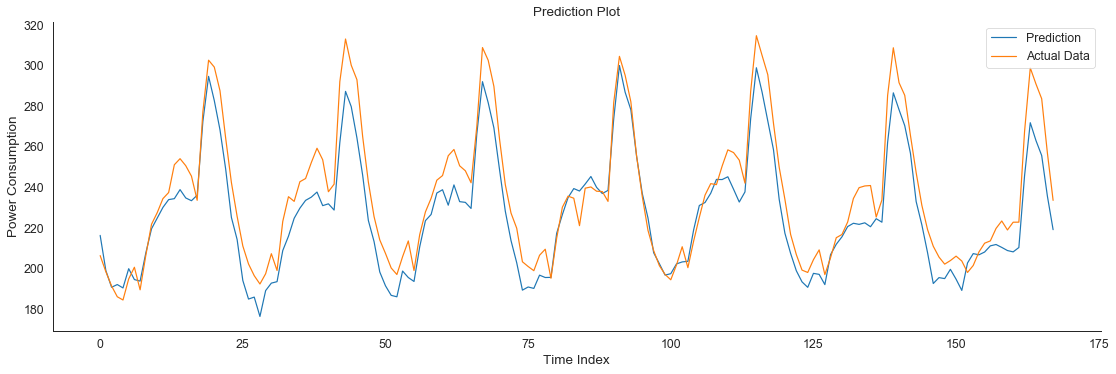

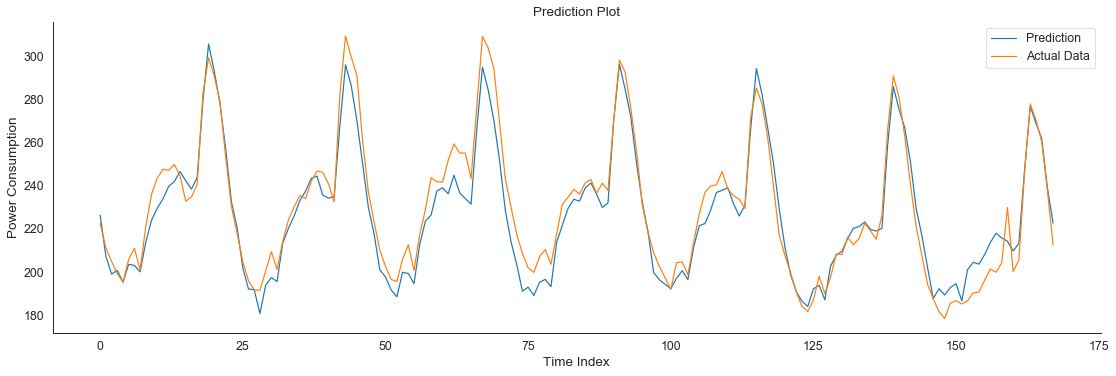

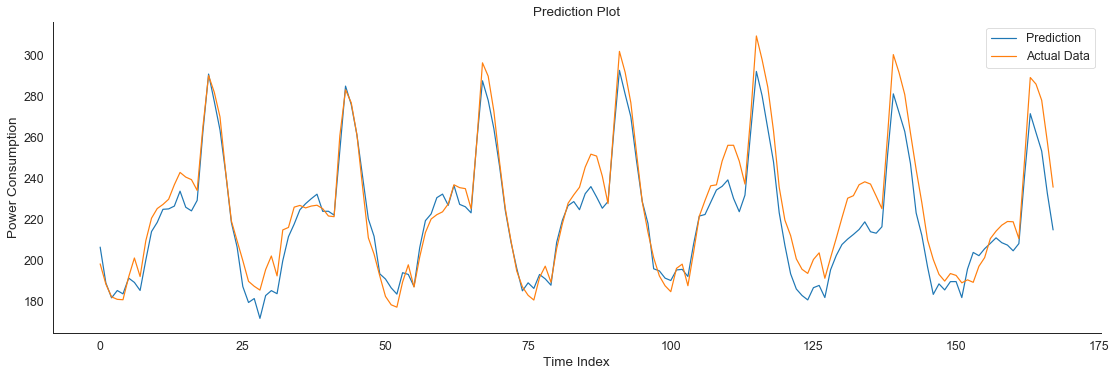

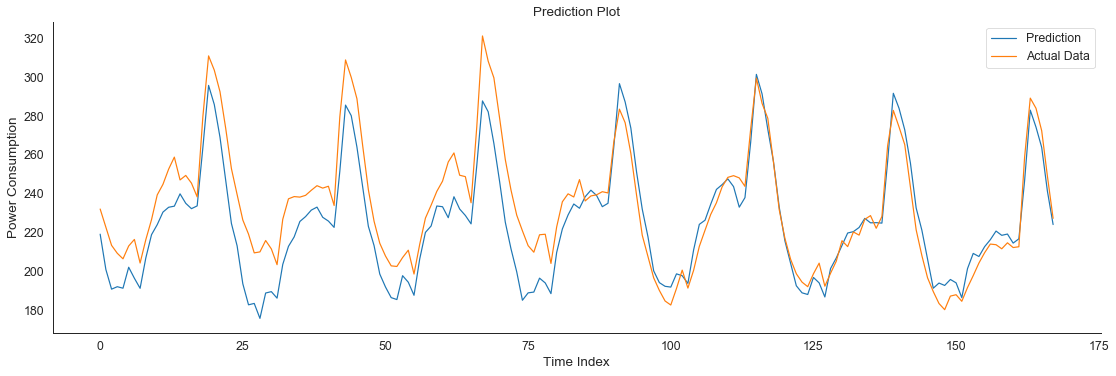

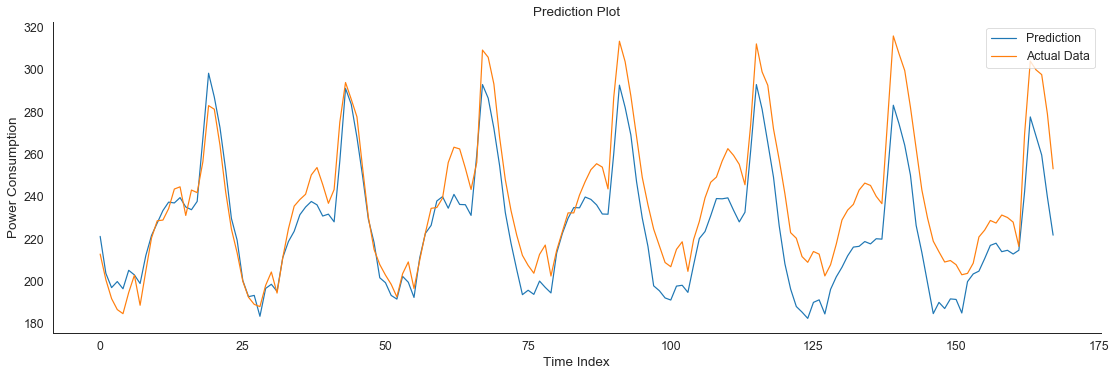

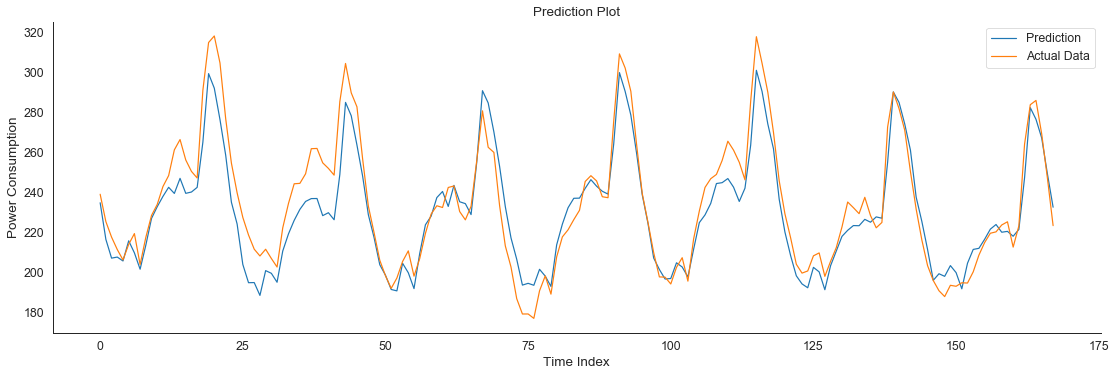

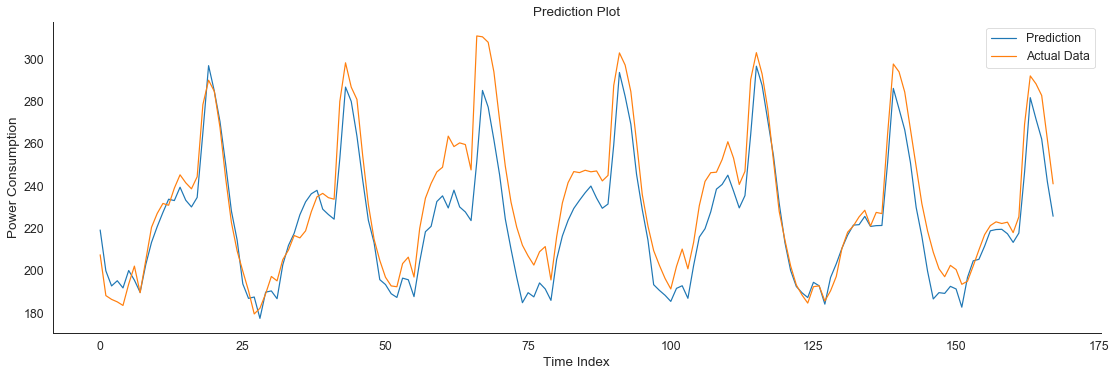

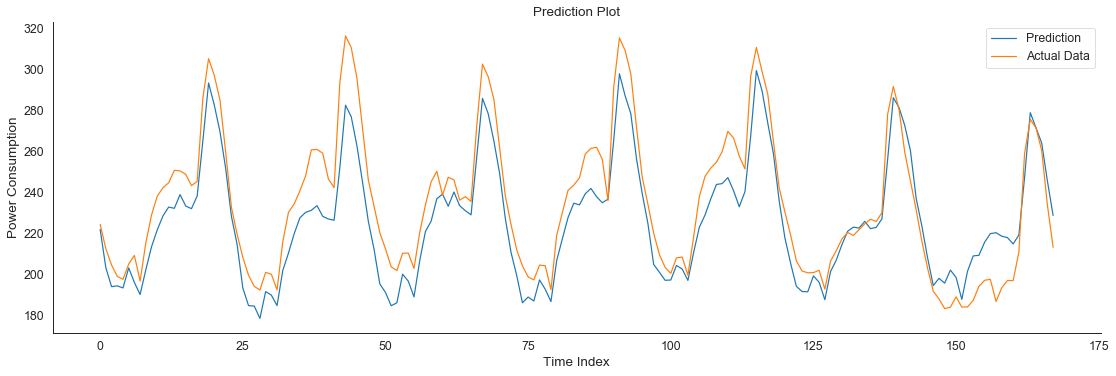

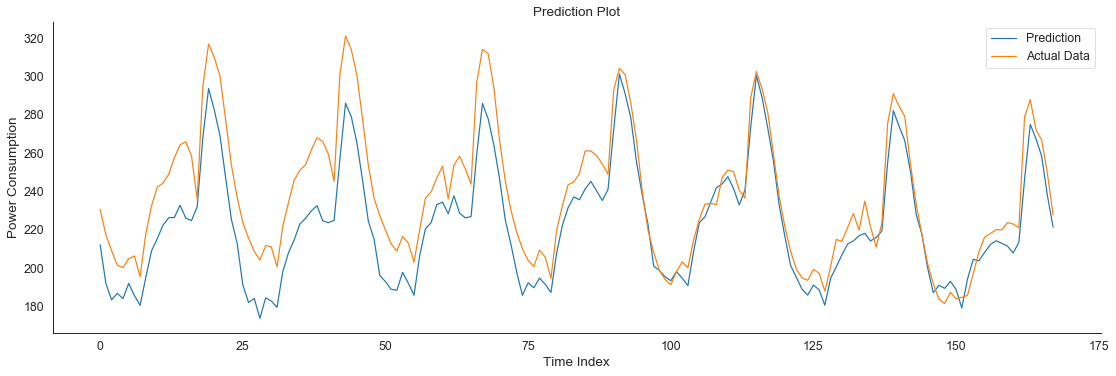

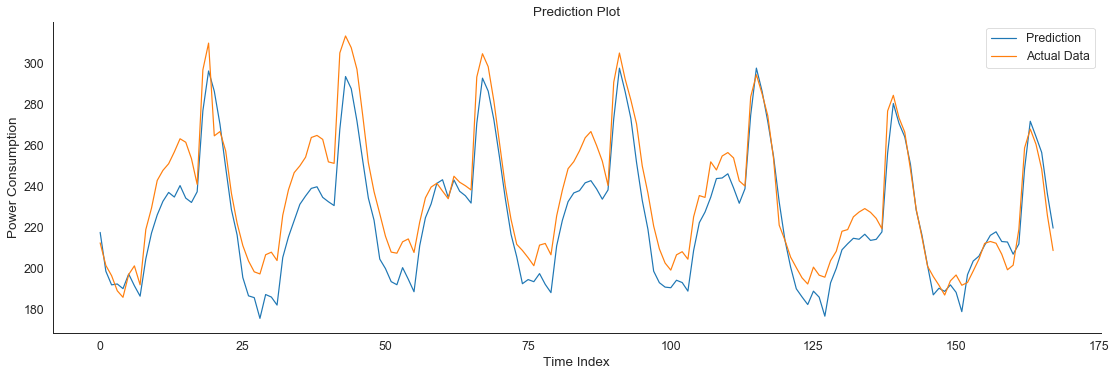

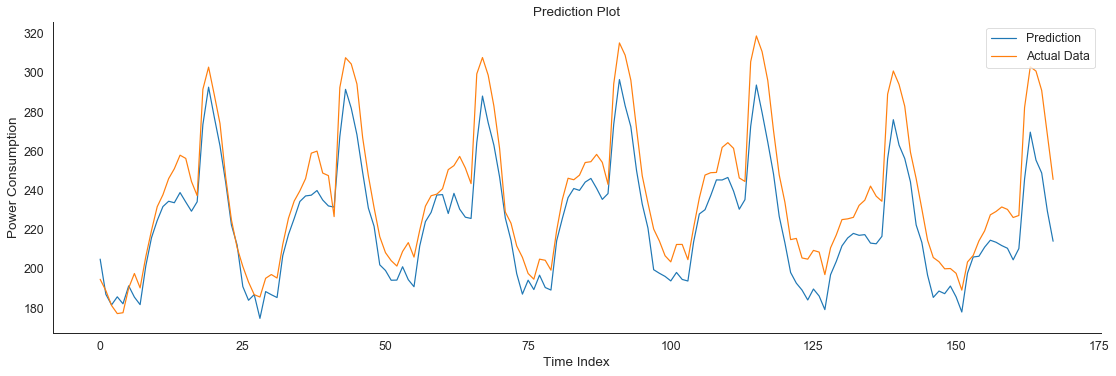

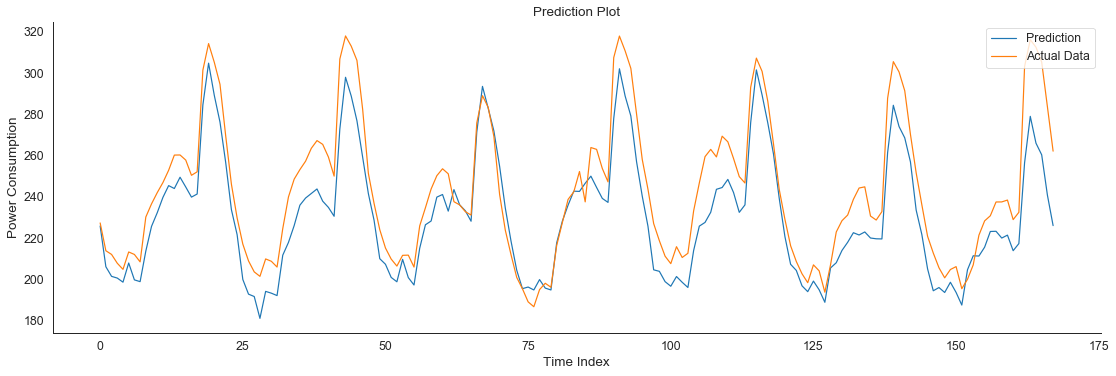

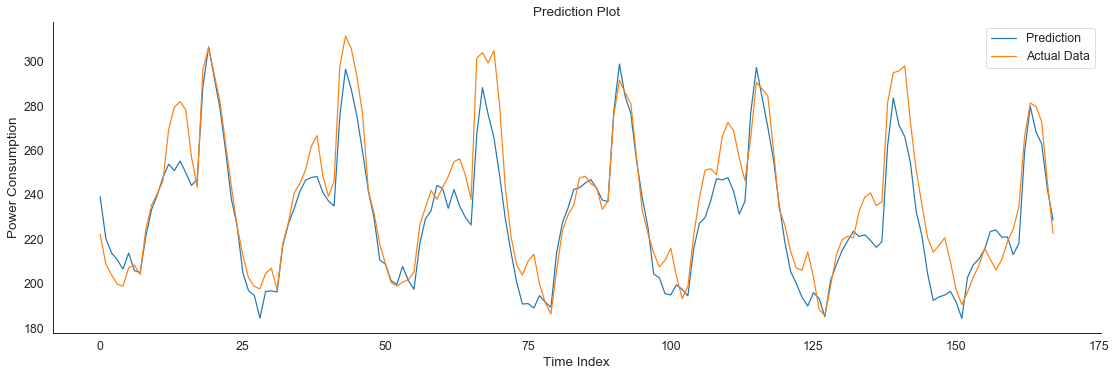

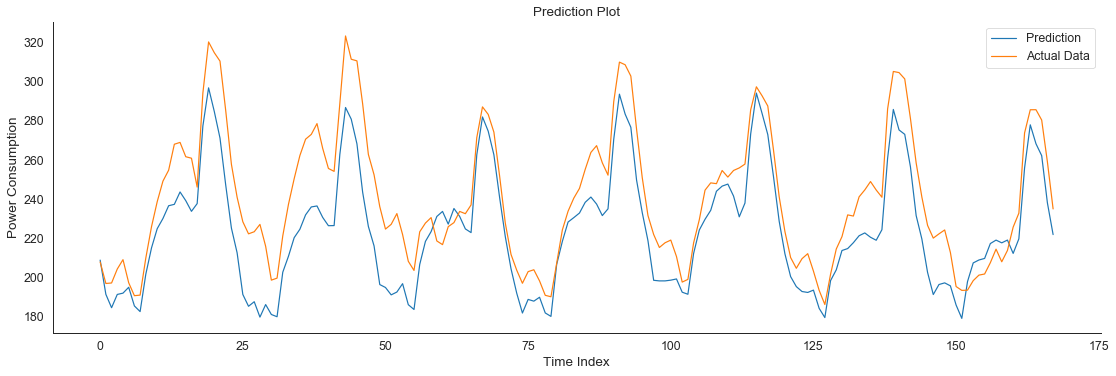

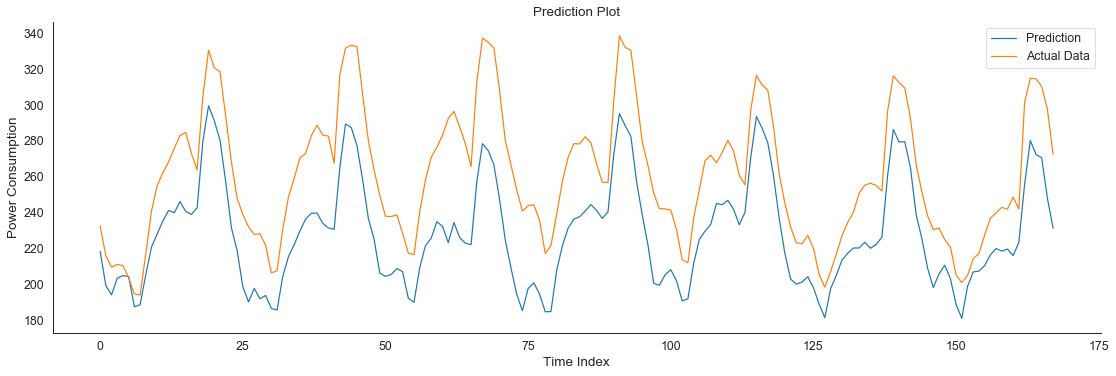

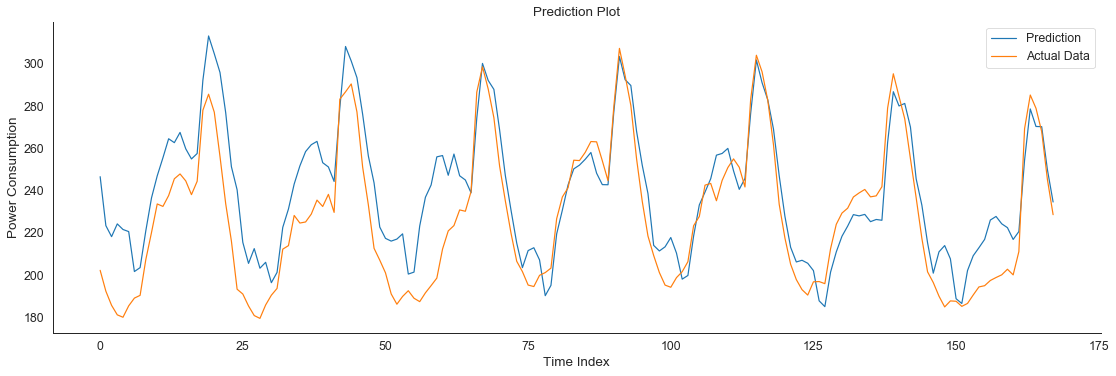

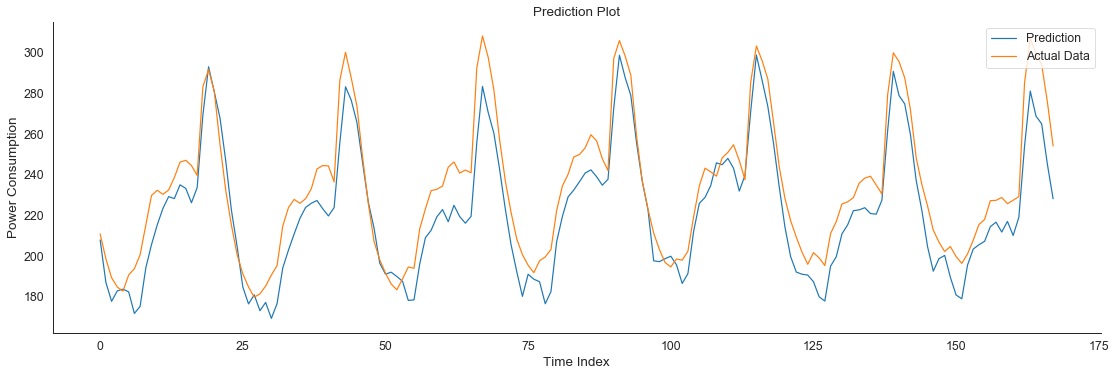

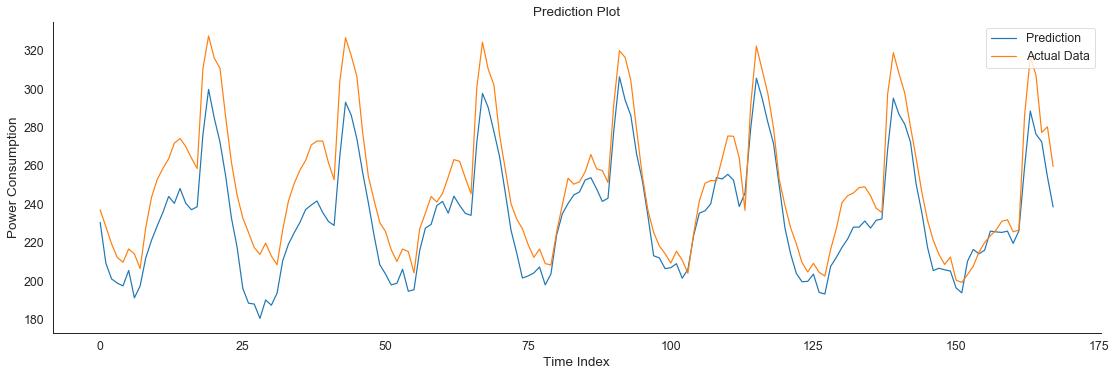

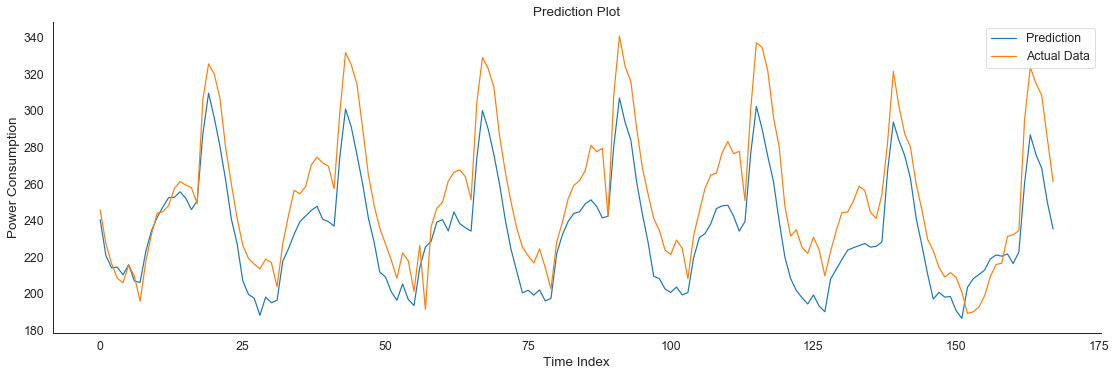

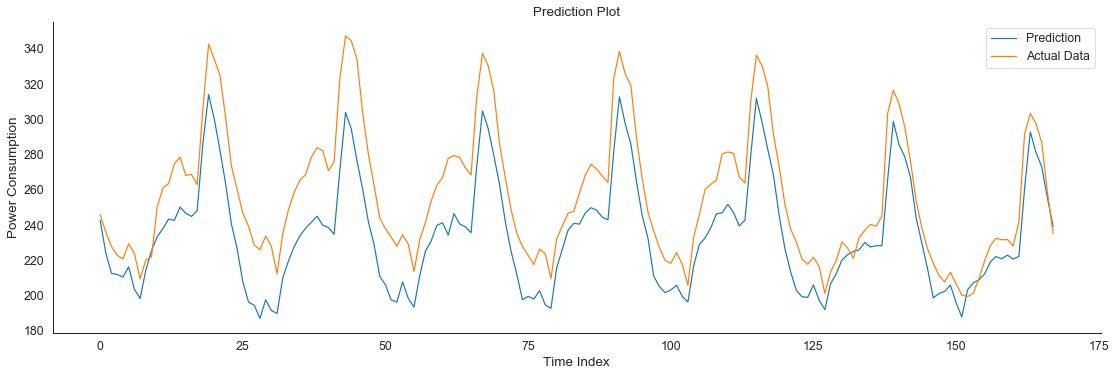

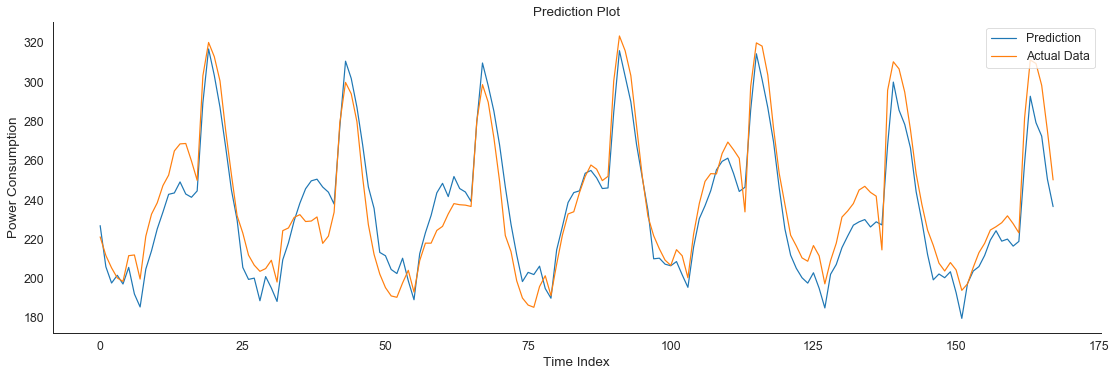

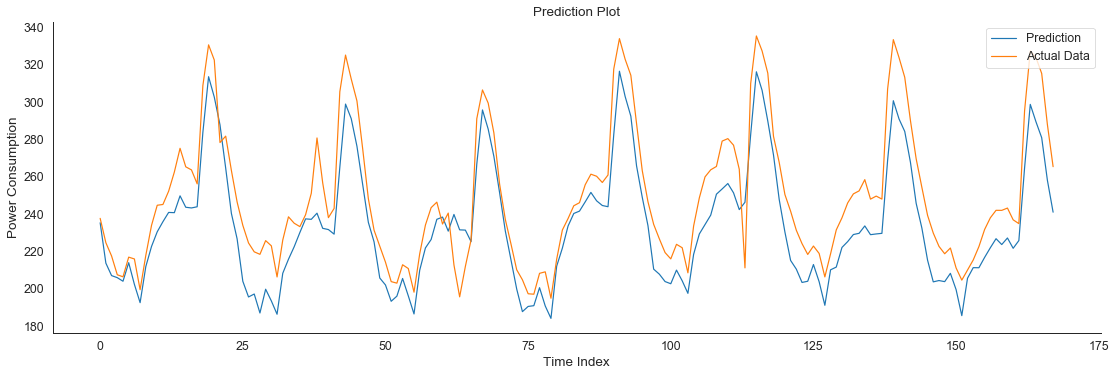

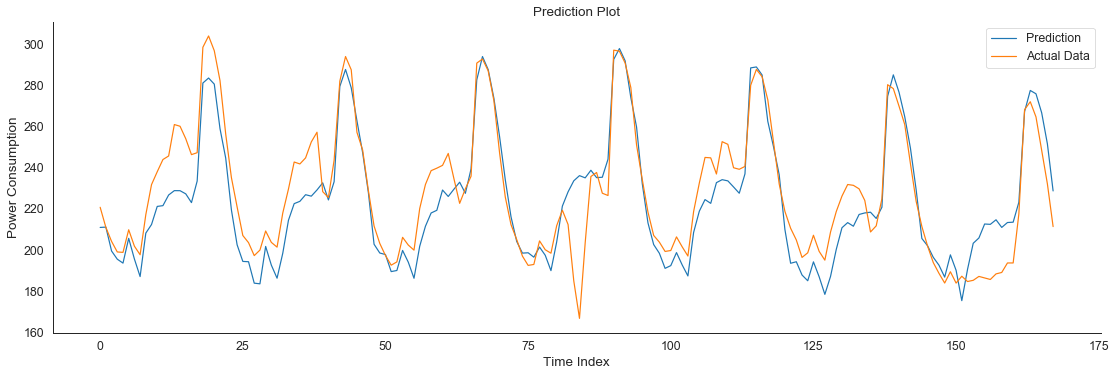

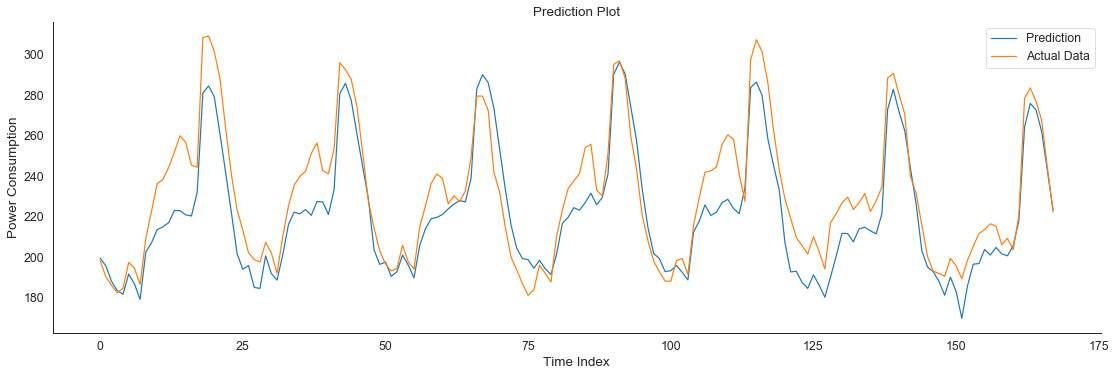

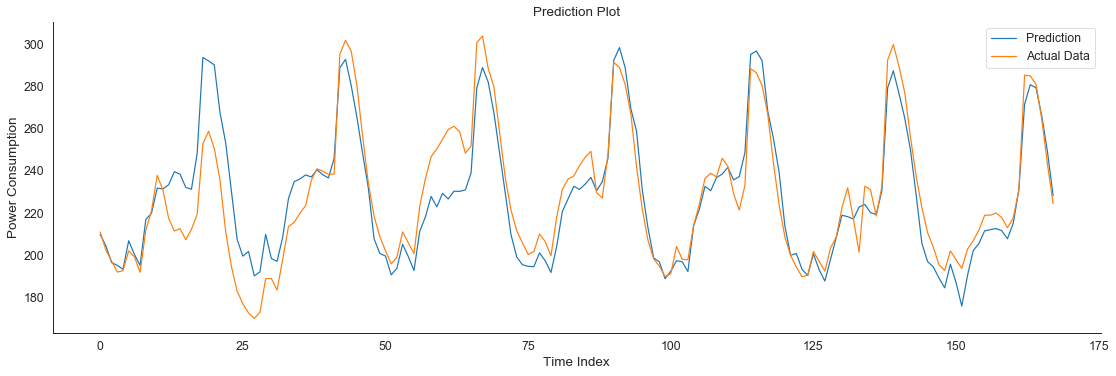

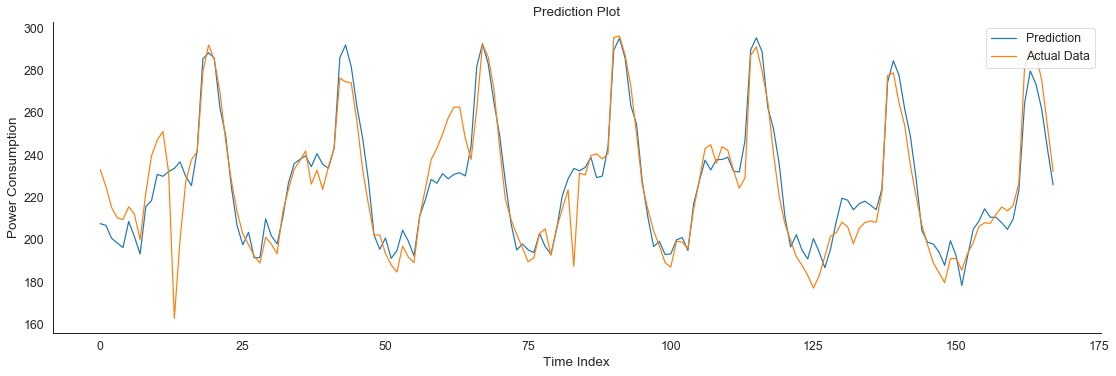

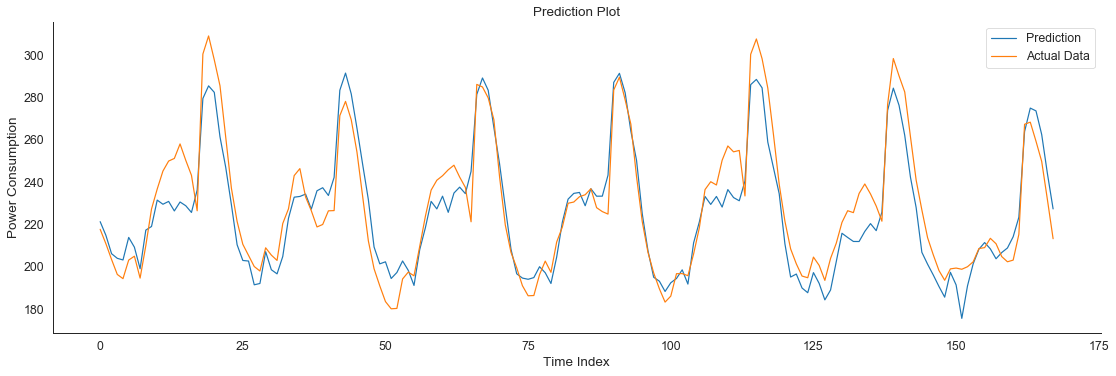

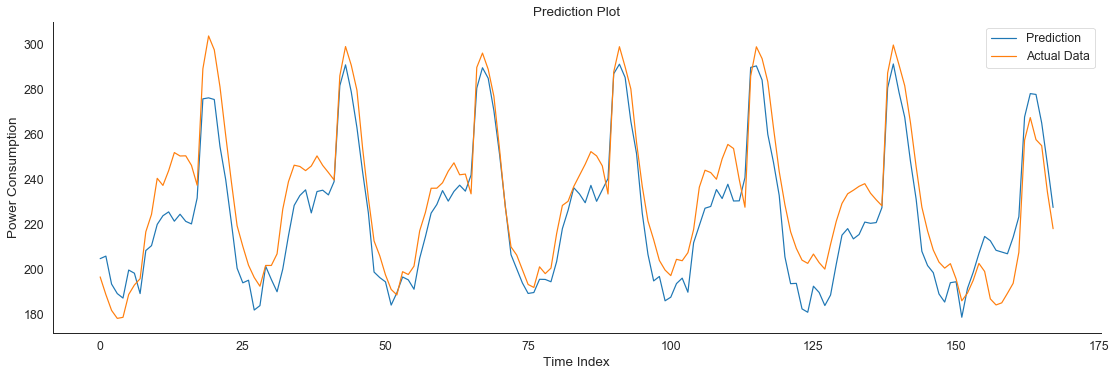

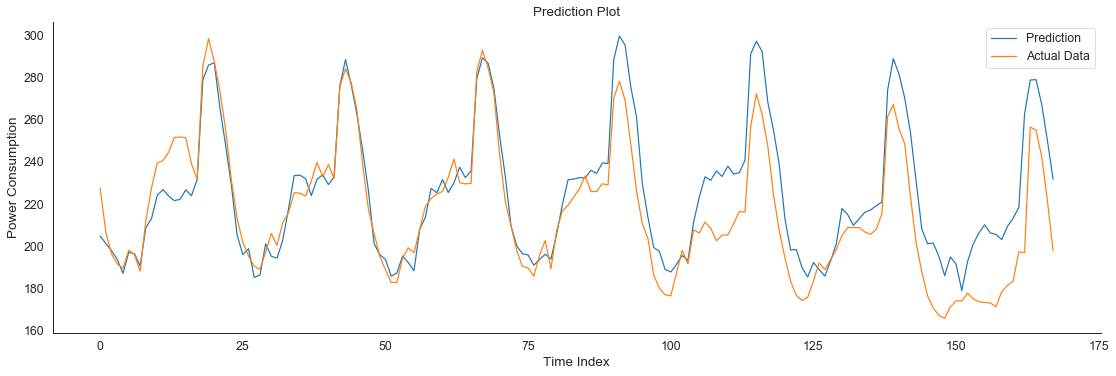

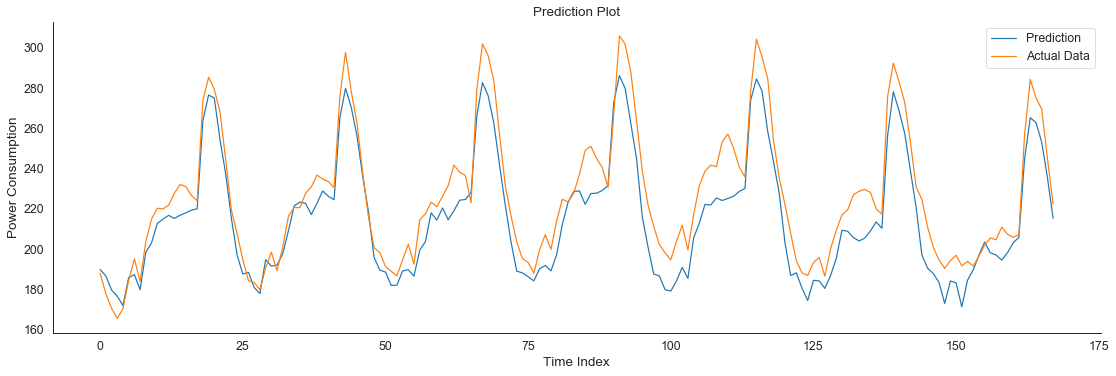

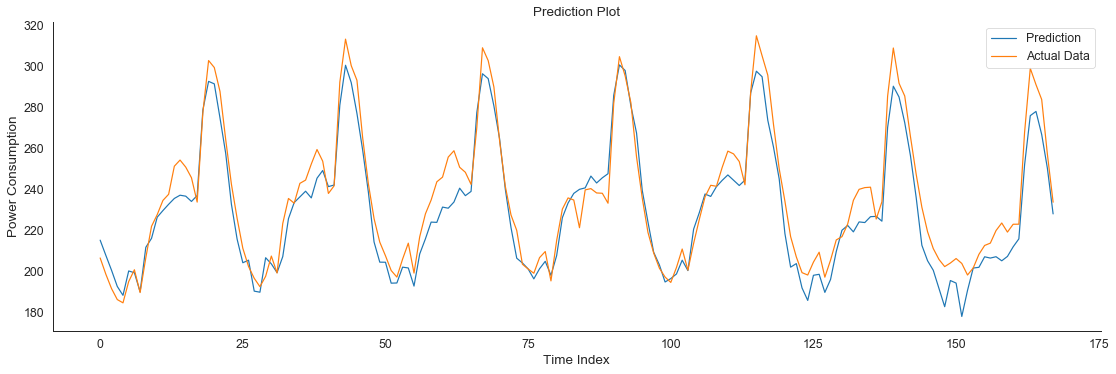

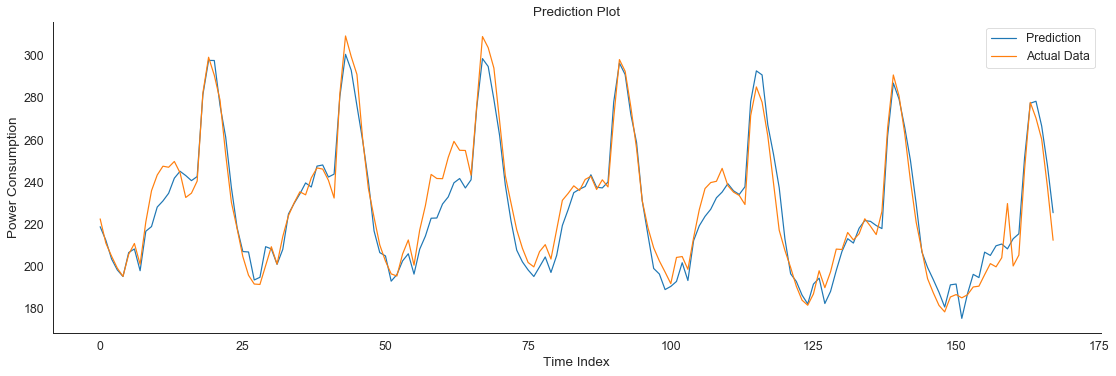

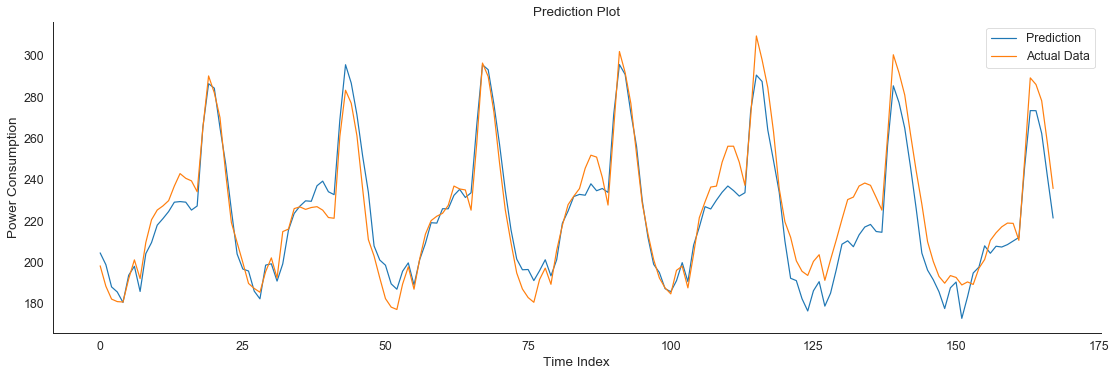

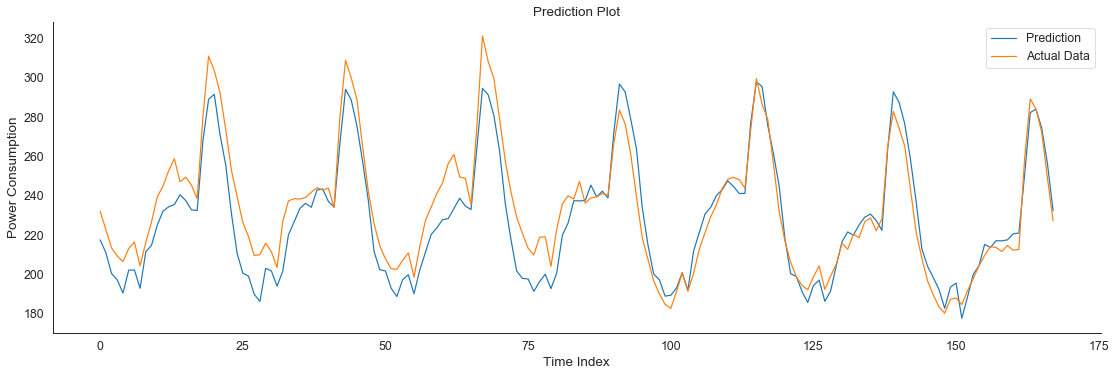

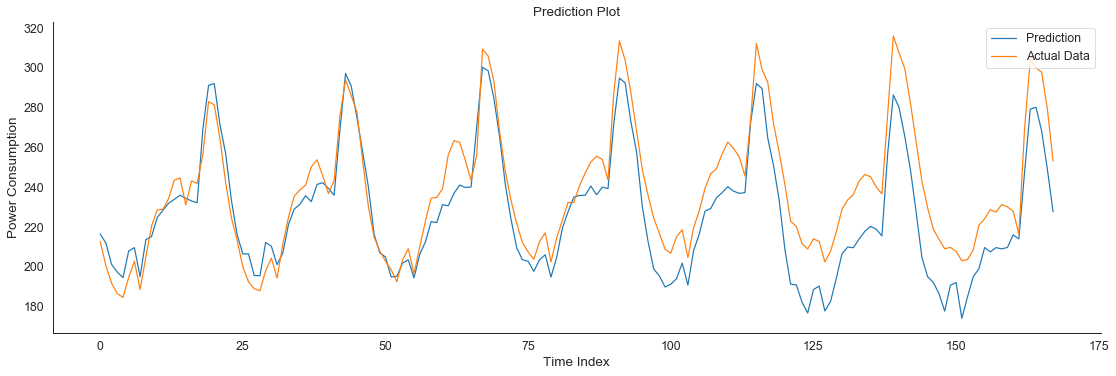

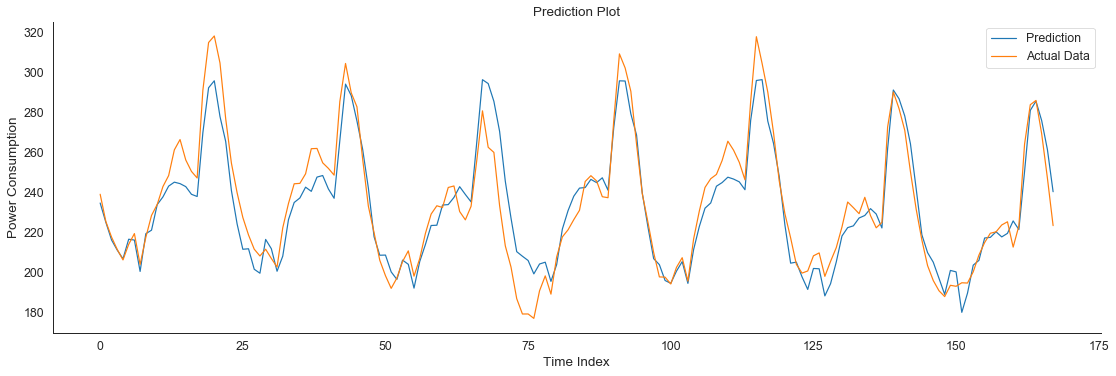

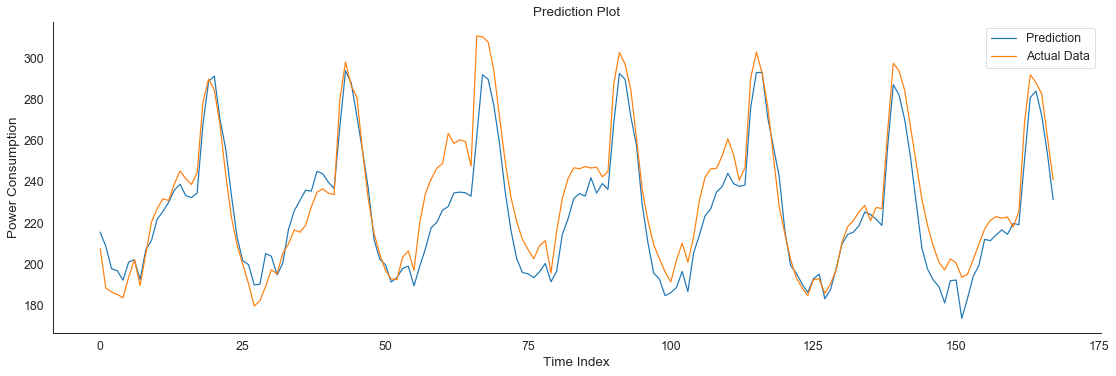

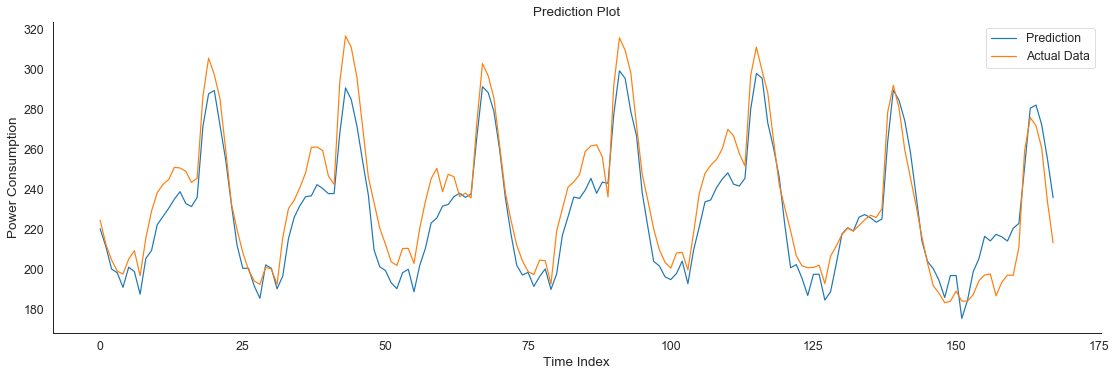

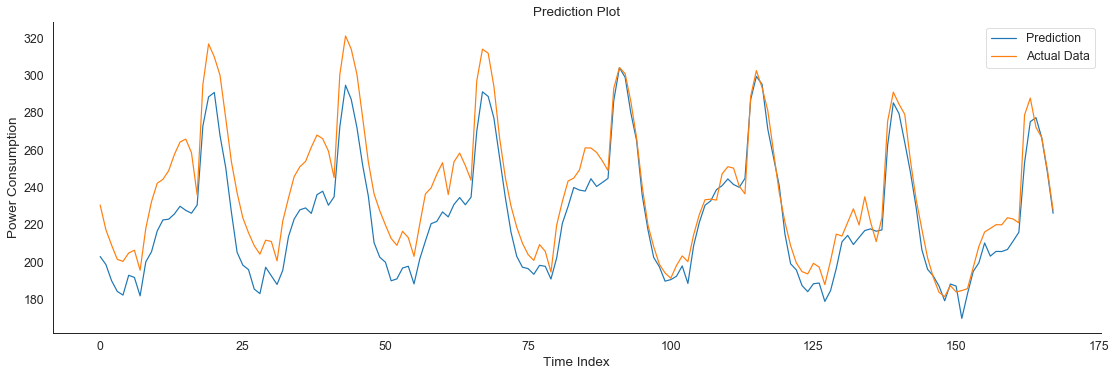

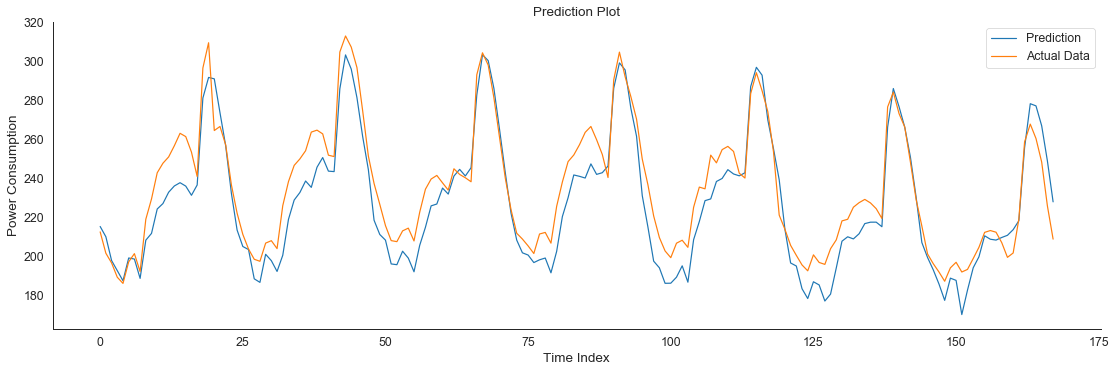

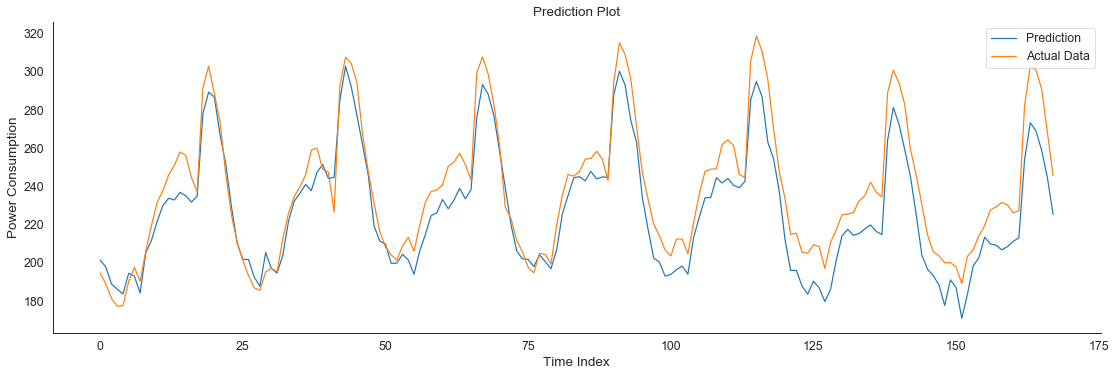

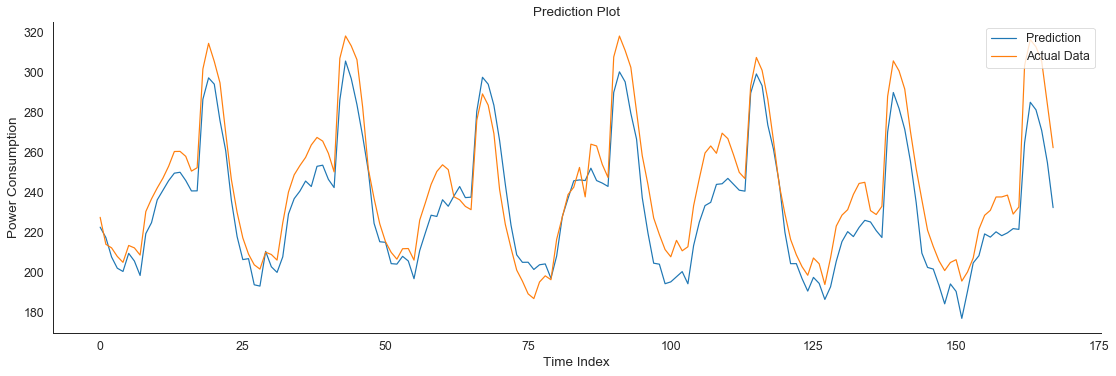

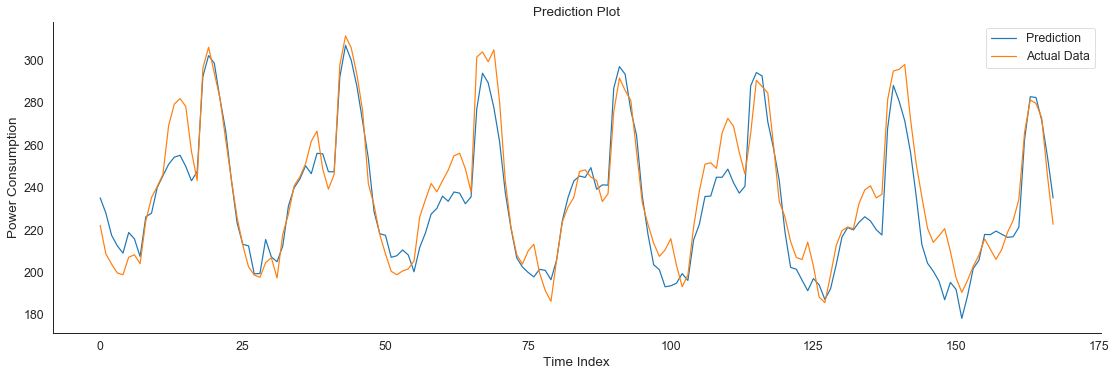

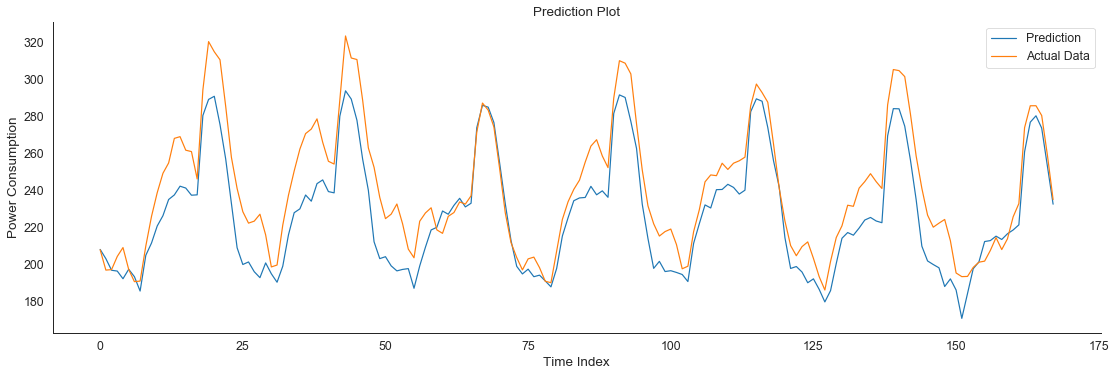

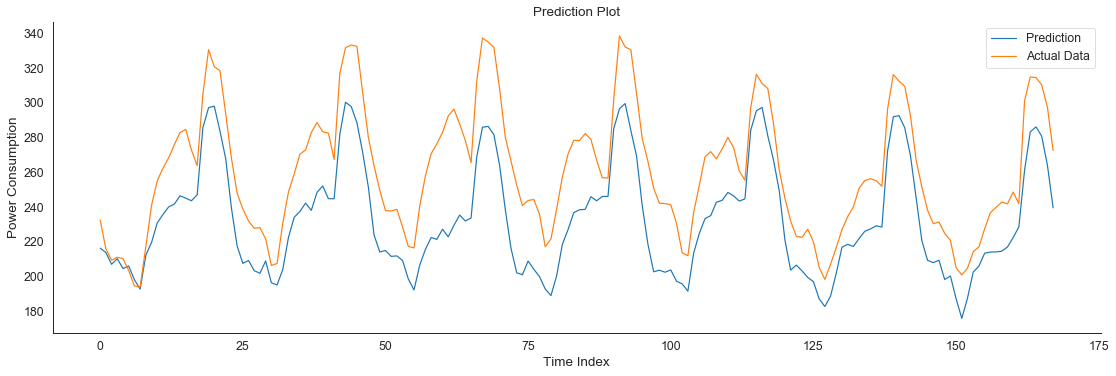

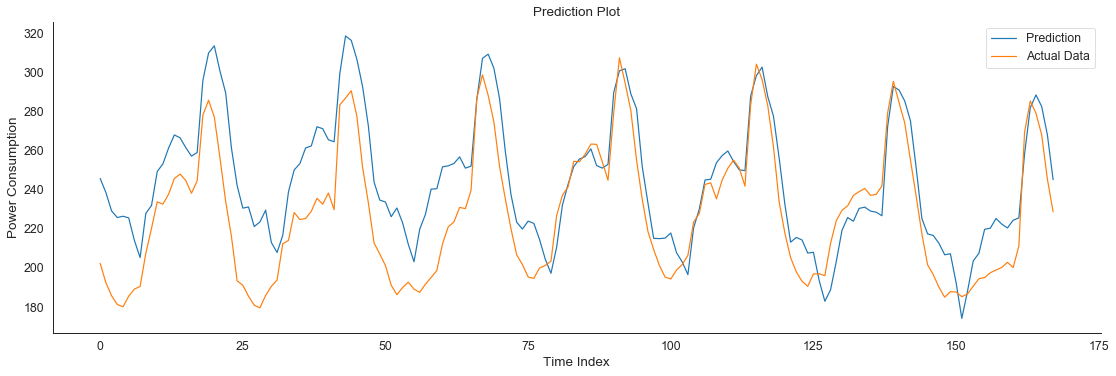

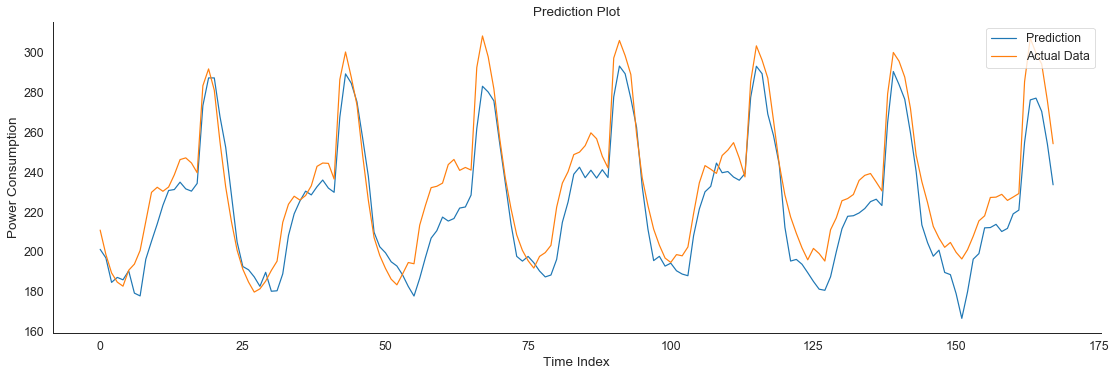

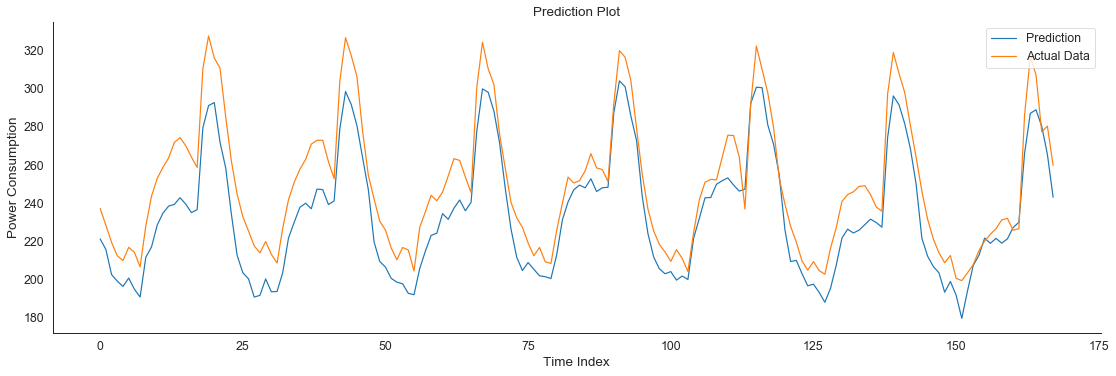

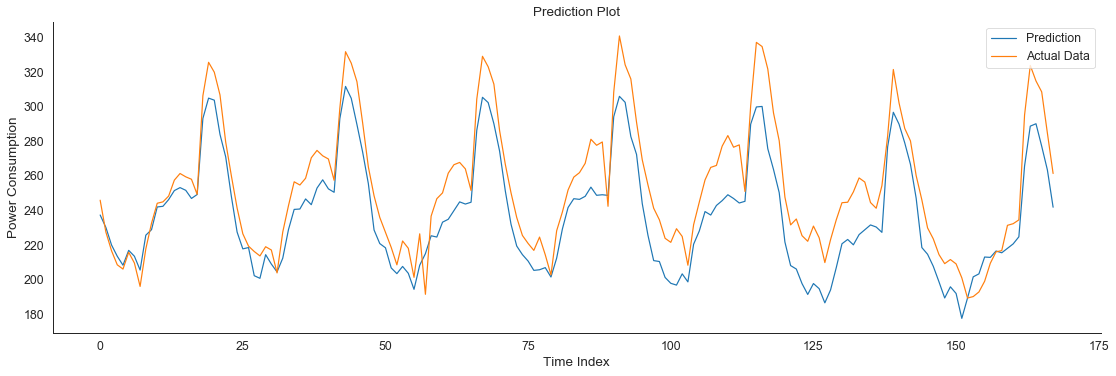

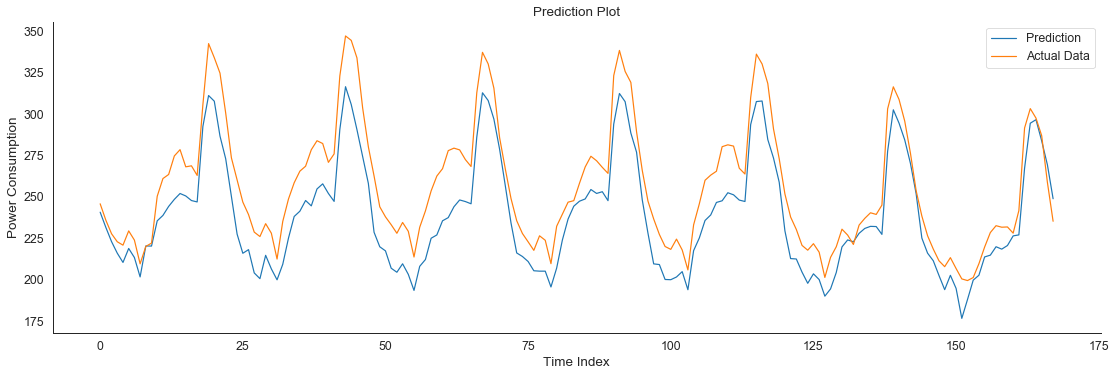

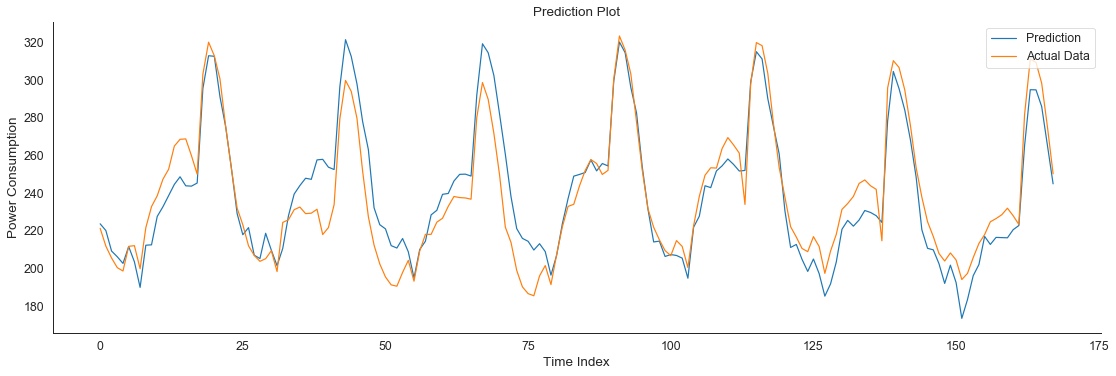

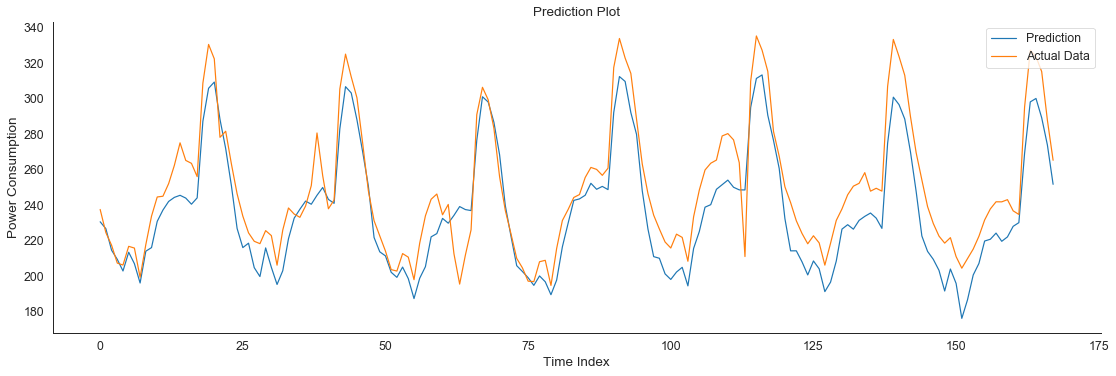

In [15]:
j = 0

for i1 in range(len(variabel)) :
    
#     in_steps = variabel.variabel.iloc[i1]
    in_steps = 1
#     in_features = variabel.variabel.iloc[i1]
    in_features = 504

    out_steps = 168
    
    json_file = open("{} parameter {} model number {}.json".format(parameter_name, algorithm_name,i1), 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model_rnn = model_from_json(loaded_model_json)

    # load weights into new model
    model_rnn.load_weights("{} parameter {} model number {}.h5".format(parameter_name, algorithm_name,i1))
    
    simpan_aktual = []
    simpan_prediksi = []
    
    for i2 in range(30):
        
        print("Testing Model {}/{}\n".format(j,len(df_par)))
        
        batas_bawah_target =  60 - i2
        batas_atas_target = batas_bawah_target-1
        target = data.power.iloc[-batas_bawah_target*24*7:-batas_atas_target*24*7]
        target = target.reset_index(drop=True)
        dataset_trg = data.power.iloc[:-batas_bawah_target*24*7]
        dataset_trg = pd.DataFrame(dataset_trg)
        
        # Normalize Dataset
        scaler = MinMaxScaler(feature_range=(0, 1))
        dataset_trg = scaler.fit_transform(dataset_trg)
        _ , _ ,test_sample = univariate_reshape(dataset_trg,in_steps,in_features,out_steps,target)
        
        predict = model_rnn.predict(test_sample)
        predict = scaler.inverse_transform(predict)
        
        simpan_aktual.append(target.values)
        simpan_prediksi.append(predict[0])
        
        if i2 == 29 :
            sp = np.array(simpan_prediksi)
            sp = sp.flatten()
            sa = np.array(simpan_aktual)
            sa = sa.flatten()

            simpan_total = pd.DataFrame(columns = ['Aktual','Prediksi'])
            simpan_total.Aktual = sa
            simpan_total.Prediksi = sp
            
            writer = ExcelWriter('{} {} actual dan prediksi {} .xlsx'.format(algorithm_name,parameter_name,i1))
            simpan_total.to_excel(writer,'Sheet1')
            writer.save()
        
        
        #DATA PREDICTION
        plt.figure(figsize=(16,5))
        plt.plot(predict[0], label = "Prediction")
        plt.plot(target, label = "Actual Data")
        plt.tick_params(left=False, labelleft=True) #remove ticks
        plt.tight_layout()
        sns.despine(top=True)
        plt.subplots_adjust(left=0.07)
        plt.xlabel('Time Index')
        plt.ylabel('Power Consumption')
        plt.legend(loc='upper right')
        plt.title('Prediction Plot')
        plt.savefig('{} parameter {} model number {} - Prediction Plot.png'.format(parameter_name, algorithm_name,j), dpi=500)

        #Mengisi dataframe
        df_par.RMSE.iloc[j] = np.sqrt(mean_squared_error(target,predict[0]))
        df_par.MAPE.iloc[j] = mean_absolute_percentage_error(target,predict[0])
        
#         from pandas import ExcelWriter
#         writer = ExcelWriter('{} {} Parameter Autosave Progress.xlsx'.format(algorithm_name,parameter_name))
#         df_par.to_excel(writer,'Sheet1')
#         writer.save()
        
        j = j+1
        clear_output(wait=False)

In [16]:
# path = r'Revisi RNN timesteps actual dan prediksi 0 .xlsx'
# data0 = pd.read_excel (path)
# d1 = data0.Prediksi

# path = r'Revisi RNN timesteps actual dan prediksi 1 .xlsx'
# data1 = pd.read_excel (path)
# d2 = data1.Prediksi

# path = r'Revisi RNN timesteps actual dan prediksi 2 .xlsx'
# data2 = pd.read_excel (path)
# d3 = data2.Prediksi

# path = r'Revisi RNN timesteps actual dan prediksi 3 .xlsx'
# data3 = pd.read_excel (path)
# d4 = data3.Prediksi

# dact = data1.Aktual

# mape1 = mean_absolute_percentage_error(dact,d1)
# rmse1 = np.sqrt(mean_squared_error(dact,d1))

# mape2 = mean_absolute_percentage_error(dact,d2)
# rmse2 = np.sqrt(mean_squared_error(dact,d2))

# mape3 = mean_absolute_percentage_error(dact,d3)
# rmse3 = np.sqrt(mean_squared_error(dact,d3))

# mape4 = mean_absolute_percentage_error(dact,d4)
# rmse4 = np.sqrt(mean_squared_error(dact,d4))

# print('Nilai MAPE {} 1 adalah {} %, Nilai RMSE {} 1 adalah {} MW'.format(parameter_name,mape1,parameter_name,rmse1) )
# print('Nilai MAPE {} 2 adalah {} %, Nilai RMSE {} 2 adalah {} MW'.format(parameter_name,mape2,parameter_name,rmse2) )
# print('Nilai MAPE {} 3 adalah {} %, Nilai RMSE {} 3 adalah {} MW'.format(parameter_name,mape3,parameter_name,rmse3) )
# print('Nilai MAPE {} 4 adalah {} %, Nilai RMSE {} 4 adalah {} MW'.format(parameter_name,mape4,parameter_name,rmse4) )

In [17]:
# path = r'Revisi RNN features actual dan prediksi 0 .xlsx'
# data0 = pd.read_excel (path)
# d1 = data0.Prediksi

# path = r'Revisi RNN features actual dan prediksi 1 .xlsx'
# data1 = pd.read_excel (path)
# d2 = data1.Prediksi

# path = r'Revisi RNN features actual dan prediksi 2 .xlsx'
# data2 = pd.read_excel (path)
# d3 = data2.Prediksi

# dact = data1.Aktual

# mape1 = mean_absolute_percentage_error(dact,d1)
# rmse1 = np.sqrt(mean_squared_error(dact,d1))

# mape2 = mean_absolute_percentage_error(dact,d2)
# rmse2 = np.sqrt(mean_squared_error(dact,d2))

# mape3 = mean_absolute_percentage_error(dact,d3)
# rmse3 = np.sqrt(mean_squared_error(dact,d3))

# print('Nilai MAPE {} 336 adalah {} %, Nilai RMSE {} 336 adalah {} MW'.format(parameter_name,mape1,parameter_name,rmse1) )
# print('Nilai MAPE {} 504 adalah {} %, Nilai RMSE {} 504 adalah {} MW'.format(parameter_name,mape2,parameter_name,rmse2) )
# print('Nilai MAPE {} 672 adalah {} %, Nilai RMSE {} 672 adalah {} MW'.format(parameter_name,mape3,parameter_name,rmse3) )

In [18]:
path = r'Revisi RNN hidden layer actual dan prediksi 0 .xlsx'
data0 = pd.read_excel (path)
d1 = data0.Prediksi

path = r'Revisi RNN hidden layer actual dan prediksi 1 .xlsx'
data1 = pd.read_excel (path)
d2 = data1.Prediksi

dact = data1.Aktual

mape1 = mean_absolute_percentage_error(dact,d1)
rmse1 = np.sqrt(mean_squared_error(dact,d1))

mape2 = mean_absolute_percentage_error(dact,d2)
rmse2 = np.sqrt(mean_squared_error(dact,d2))

print('Nilai MAPE {} 2 adalah {} %, Nilai RMSE {} 2 adalah {} MW'.format(parameter_name,mape1,parameter_name,rmse1) )
print('Nilai MAPE {} 3 adalah {} %, Nilai RMSE {} 3 adalah {} MW'.format(parameter_name,mape2,parameter_name,rmse2) )

Nilai MAPE hidden layer 2 adalah 5.681398916499757 %, Nilai RMSE hidden layer 2 adalah 17.055612780342713 MW
Nilai MAPE hidden layer 3 adalah 5.3105357982036185 %, Nilai RMSE hidden layer 3 adalah 15.758701859284454 MW


In [19]:
print("Uji Normalitas TS1 dan TS2")
from scipy.stats import normaltest
stat, p = normaltest(d1-d2)
print('Statistics=%.3f, p=%.5f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)\n')
else:
    print('Sample does not look Gaussian (reject H0)\n')

print("Uji Normalitas TS1 dan TS3")
# normality test
from scipy.stats import normaltest
stat, p = normaltest(d1-d3)
print('Statistics=%.3f, p=%.5f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)\n')
else:
    print('Sample does not look Gaussian (reject H0)\n')
    
print("Uji Normalitas TS1 dan TS4")
# normality test
from scipy.stats import normaltest
stat, p = normaltest(d1-d4)
print('Statistics=%.3f, p=%.5f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)\n')
else:
    print('Sample does not look Gaussian (reject H0)\n')

Uji Normalitas TS1 dan TS2
Statistics=10.599, p=0.00499
Sample does not look Gaussian (reject H0)

Uji Normalitas TS1 dan TS3
Statistics=6.788, p=0.03358
Sample does not look Gaussian (reject H0)

Uji Normalitas TS1 dan TS4


NameError: name 'd4' is not defined

In [ ]:
import scipy
from scipy.stats import wilcoxon

print("Uji Signifikan TS1 TS2")
stat, p = scipy.stats.ranksums(d1,d2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample is not significantly different (accept H0)\n')
else:
    print('Sample is significantly different (reject H0)\n')
    
print("Uji Signifikan TS1 TS3")
stat, p = scipy.stats.ranksums(d2,d3)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample is not significantly different (accept H0)\n')
else:
    print('Sample is significantly different (reject H0)\n')
    
print("Uji Signifikan TS1 TS4")
stat, p = scipy.stats.ranksums(d3,d4)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample is not significantly different (accept H0)\n')
else:
    print('Sample is significantly different (reject H0)\n')

In [ ]:
import scipy
from scipy.stats import wilcoxon
stat, p = scipy.stats.ranksums(d1,d3)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample is not significantly different (accept H0)')
else:
    print('Sample is significantly different (reject H0)')

In [ ]:
import scipy
from scipy.stats import wilcoxon
stat, p = scipy.stats.ranksums(d1,d4)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample is not significantly different (accept H0)')
else:
    print('Sample is significantly different (reject H0)')

In [ ]:
[stat,pval] = scipy.stats.ttest_ind(d4,d3)
alpha = 0.05;
print('T stat = {}'.format(stat))
print('P Value = {}'.format(pval))
if pval < alpha:
    print('Sample is significantly different (reject H0)')
else:
    print('Sample is not significantly different (accept H0)')

Menyimpan data ke excel

In [ ]:
# writer = ExcelWriter('{} {} finish.xlsx'.format(algorithm_name,parameter_name))
# df_par.to_excel(writer,'Sheet1')
# writer.save()
# print('complete')